# 使用k近鄰來前景分割
Image Segmentation using K-Means Clustering

baseon:https://medium.com/swlh/image-segmentation-using-k-means-clustering-46a60488ae71


使用顏色集群和canny邊緣檢測

In [17]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt 

In [18]:
original_img = cv2.imread("img/demo.jpg")


從rgb三通道轉換到hsv

In [19]:
img = cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)

In [20]:
img.shape

(280, 347, 3)

接下来，将MxNx3图像转换为Kx3矩阵，其中K＝MxN，并且每行现在是RGB的三维空间中的向量。

In [21]:
vectorized = img.reshape((-1,3))

In [22]:
vectorized.shape

(97160, 3)

In [23]:
vectorized = np.float32(vectorized)

我们将用k=3聚类，
定义标准、聚类数（K）并应用K-均值（）

In [24]:
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

In [30]:
K =5
attempts = 10
''' 
criteria:
迭代终止准则。当满足该标准时，算法迭代停止。实际上，它应该是 3 个参数的元组
。它们是`(type, max_iter, epsilon)`

attempt:
标志指定使用不同初始标签执行算法的次数。该
算法返回产生最佳紧凑性的标签。这种紧凑性作为输出返回。


flags:
该标志用于指定如何取初始中心。通常为此使用两个标志
cv.KMEANS_PP_CENTERS和cv.KMEANS_RANDOM_CENTERS。
'''
ret,label ,center = cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [31]:
center = np.uint8(center)


In [32]:
res = center[label.flatten()]
res_img= res.reshape((img.shape))

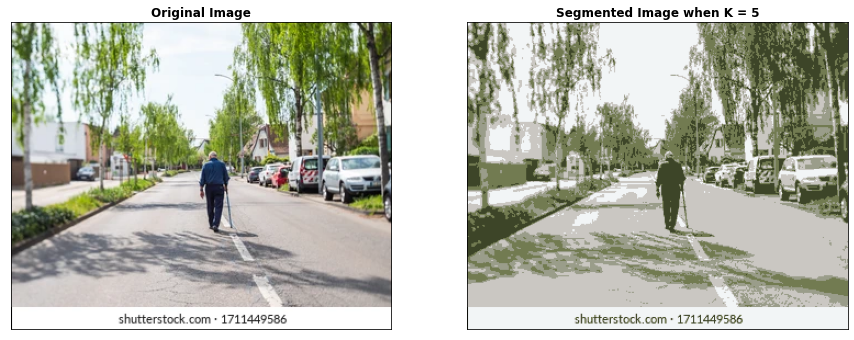

In [33]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res_img)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

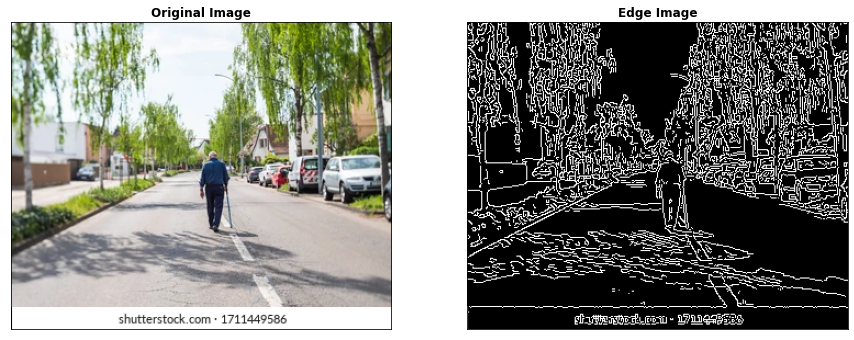

In [34]:
# 第一个参数是我们的输入图像。第二个和第三个参数分别是我们的最小和最大阈值。
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()